In [3]:
import numpy as np

def f(x):
    return x[0]**2 - 2*x[0] + x[1]**2 + x[1]

def constraint(x):
    return x[0]**2 - x[1]

def penalty(x, p=2):
    return max(0, constraint(x))**2

def main_pen(x, nu):
    return f(x) + nu * penalty(x)

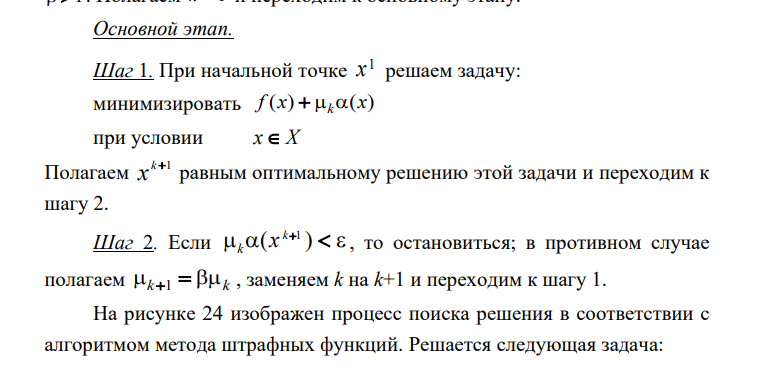


# Метод штрафных функций

In [4]:
from scipy.optimize import minimize

def method_penalty(f,x0,epsilon):
    x=x0
    nu=0.1 #штрафной параметр 
    b=0.1 #константа бета
    counter=1 #счетчик цикла
    while True:
        result= minimize(main_pen,x,nu)
        x=result.x
        if(nu*penalty(x)< epsilon): #условия остановки 
            break
        nu*=b
        counter+=1
    
    return x[0],x[1]
# Начальные условия и параметры
x0=[1,1]
epsilon = 0.001                
x, y = method_penalty(f,x0, epsilon)

print(f"x = {x}, y = {y}")
print(f"f = {x ** 2 + y ** 2 - 3 * x + 15 * y}")

x = 0.9997003980604615, y = -0.49984975952862587
f = -9.247596919127702


# Метод барьерных функций


**Метод барьерных функций** (или метод внутренней точки) используется для решения задач нелинейного программирования с ограничениями. Он включает в себя добавление к целевой функции штрафов за нарушение ограничений, чтобы "направить" решение к допустимой области.

In [16]:
import numpy as np
from scipy.optimize import minimize

# Целевая функция
def f(x):
    return x[0]**2 - 2*x[0] + x[1]**2 + x[1]

# Ограничения (в виде барьерной функции)
def barrier(x):
    # Пример ограничений: x[0] > 0, x[1] > 0
    g1 = x[0] - 0.5  # x >= 0.5
    g2 = x[1] - 1.5  # y >= 1.5
    g3 = 2 - x[0]    # x <= 2
    g4 = 3 - x[1]    # y <= 3
    return np.sum([min(0, g)**2 for g in [g1, g2, g3, g4]])

# Основная барьерная функция
def main_bar(x, nu):
    return f(x) + (nu * barrier(x))

# Метод барьерных функций
def method_barier(f, x0, epsilon):
    x = np.array(x0)  # Начальное приближение
    nu = 0.1  # Штрафной параметр 
    b = 10.  # Константа увеличения штрафного параметра
    counter = 1  # Счетчик цикла
    
    while True:
        result = minimize(main_bar, x, args=(nu,), method='L-BFGS-B')
        x = result.x
        if nu * barrier(x) < epsilon:  # Условия остановки 
            break
        nu *= b
        counter += 1
    
    return x[0], x[1]

# Начальные условия и параметры
x0 = [1, 1]
epsilon = 0.001                
x, y = method_barier(f, x0, epsilon)

print(f"x = {x}, y = {y}")
print(f"f = {x ** 2 + y ** 2 - 3 * x + 15 * y}")

x = 1.0, y = 1.499800015630422
f = 22.746400321341344
